In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
pip install plotly


    100% |████████████████████████████████| 7.2MB 463kB/s ta 0:00:011    64% |████████████████████▋           | 4.6MB 1.1MB/s eta 0:00:03
  Stored in directory: /home/shakul/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.sample(6)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
12204,18120,NaN,Mauritania,2020-02-27,0.0,0.0
1794,2635,NaN,Belize,2020-03-28,2.0,0.0
12255,18206,NaN,Mauritius,2020-02-06,0.0,0.0
8652,12853,Saint Barthelemy,France,2020-02-03,0.0,0.0
14426,21427,NaN,Romania,2020-02-17,0.0,0.0
5071,7522,Jiangsu,China,2020-02-22,631.0,0.0


<BarContainer object of 10 artists>

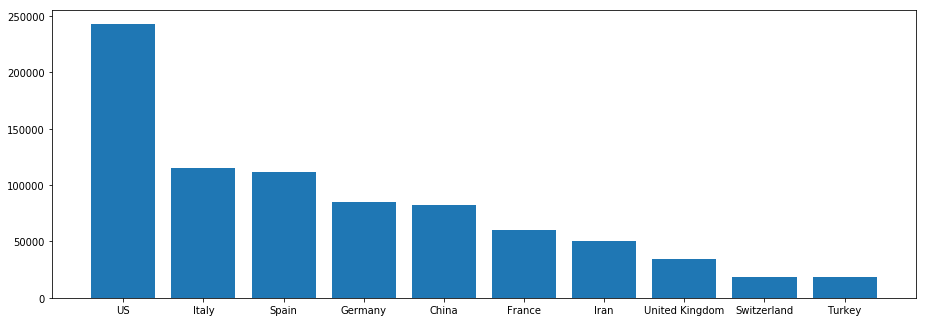

In [6]:
df = train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum().groupby(
    ['Country_Region','Province_State']).max().groupby(['Country_Region']).sum().sort_values(ascending=False)
df = pd.DataFrame(df).head(10)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
confirmed = df.values.tolist()
confirmed = [x[0] for x in confirmed]
ax.bar(df.index.tolist(),confirmed)

In [7]:
df = train.fillna('NA')

In [8]:
df_ConfirmedCases = df['ConfirmedCases']

In [11]:
place_list = []
time_list = []
for i in range(len(df)):
  
    country = df['Country_Region'][i]
    province = df['Province_State'][i]
    confirmed = df['ConfirmedCases'][i]
    fatalities = df['Fatalities'][i]
    date = df['Date'][i]
    dic = { 'Country': country, 
            'Province': province,
            'ConfirmedCases': confirmed,
            'Fatalities': fatalities,
            'Date': date
          }
    place_list.append(dic)



In [29]:
from sklearn.metrics import r2_score
submission = []
k = 1
end_date = '2020-03-25'
i=0
while i < (len(place_list)):
    conf_list = []
    fatal_list = []
    while place_list[i]['Date'] != end_date :
        conf_list.append(place_list[i]['ConfirmedCases'])
        fatal_list.append(place_list[i]['Fatalities'])
        i=i+1
    x_c = np.arange(len(conf_list))
    conf_list = np.array(conf_list)
    fatal_list = np.array(fatal_list)
    print(conf_list)
    print("Run:",i)
    dim_max = 8
    dim_c = 1
    dim_f = 1
    max_score_c = 0
    max_score_f = 0
    for dim in range(1, dim_max):
        fit_c = np.polyfit(x_c, conf_list, dim)
        fit_f = np.polyfit(x_c, fatal_list, dim)
        y_pred_c = np.poly1d(fit_c)(x_c)
        y_pred_f = np.poly1d(fit_f)(x_c)
        r2_score_c = r2_score(y_pred_c, conf_list)
        r2_score_f = r2_score(y_pred_f, fatal_list)
        if r2_score_c > max_score_c:
            max_score_c = r2_score_c
            dim_c = dim
        if r2_score_f > max_score_f:
            max_score_f = r2_score_f
            dim_f = dim
            
    x_pred = np.arange(len(conf_list), len(conf_list)+43)        
    fit_c = np.polyfit(x_c, conf_list, dim_c)
    fit_f = np.polyfit(x_c, fatal_list, dim_f)
    y_pred_c = np.poly1d(fit_c)(x_pred)
    y_pred_f = np.poly1d(fit_f)(x_pred)
    for j in range(len(x_pred)):
        dic = { 'ForecastId': k , 'ConfirmedCases': int(y_pred_c[j]),
             'Fatalities': int(y_pred_f[j])
              }
        k=k+1
        submission.append(dic)
    i = i+1    

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  4.  4.  5.  7.  7.  7. 11. 16.
 21. 22. 22. 22. 24. 24. 40. 40. 74.]
Run: 63
[ 94. 110. 110. 120. 170. 174. 237. 273.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.
  10.  12.  23.  33.  38.  42.  51.  55.  59.  64.  70.  76.  89. 104.
 123.]
Run: 135
[174. 186. 197. 212. 223. 243. 259. 277.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   1.   1.   1.   1.   1.   1.   3.   5.  12.  12.  17.  17.  19.  20.
  20.  20.  24.  26.  37.  48.  54.  60.  74.  87.  90. 139. 201. 230.
 264.]
Ru

[8.600e+01 9.400e+01 9.400e+01 9.400e+01 1.520e+02 1.520e+02 1.630e+02
 3.040e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 2.000e+00 8.000e+00
 1.300e+01 2.300e+01 5.000e+01 1.090e+02 1.690e+02 2.000e+02 2.390e+02
 2.670e+02 3.140e+02 3.140e+02 5.590e+02 6.890e+02 8.860e+02 1.058e+03
 1.243e+03 1.486e+03 1.795e+03 2.257e+03 2.815e+03 3.401e+03 3.743e+03
 4.269e+03]
Run: 1719
[6.2350e+03 7.2840e+03 9.1340e+03 1.0836e+04 1.1899e+04 1.2775e+04
 1.3964e+04 1.5348e+04 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00


[1448. 1456. 1467. 1475. 1484. 1494. 1501. 1507.    2.    5.   23.   23.
   36.   46.   51.   58.   78.   87.  100.  111.  127.  139.  150.  168.
  172.  183.  195.  210.  215.  222.  222.  226.  235.  237.  238.  242.
  244.  245.  246.  249.  249.  251.  252.  252.  252.  252.  252.  252.
  252.  252.  252.  252.  252.  252.  252.  252.  252.  252.  252.  252.
  252.  252.  252.  253.  253.  253.  254.  254.  254.  254.  254.]
Run: 4383
[254. 254. 254. 254. 254. 254. 254. 254.   1.   3.   3.   4.   5.   7.
   9.   9.  12.  29.  29.  38.  46.  58.  64.  71.  81.  89.  99. 109.
 127. 133. 135. 140. 143. 144. 146. 146. 146. 146. 146. 146. 146. 146.
 146. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146.
 146. 146. 146. 146. 146. 146. 146. 147. 146. 146. 146. 146. 146. 146.
 146.]
Run: 4455
[146. 146. 146. 146. 146. 146. 146. 146.   4.   5.   8.  19.  22.  33.
  40.  43.  46.  52.  62.  64.  72.  80.  99. 106. 117. 124. 131. 138.
 144. 157. 157. 159. 162. 162. 163. 163. 16

[ 4.  4.  4. 19. 19. 19. 19. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  2.  2.  2.  2.  3.  4. 14. 18. 23. 30. 36. 45.]
Run: 6471
[ 51.  51.  65.  65.  81.  98. 109. 134.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   5.   9.
   9.  13.  22.  23.  26.  27.  35.  41.  50.  69.  89. 117. 134. 158.
 177.]
Run: 6543
[231. 263. 295. 314. 330. 347. 375. 396.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.   1.   1.   1.   1.   1.   5.   6.

[12. 16. 16. 21. 23. 26. 29. 29.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  2.  3.  4.]
Run: 8055
[  5.   5.   5.   5.   5.   5.   5.   7.   0.   0.   0.   0.   0.   0.
   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   2.   2.   2.   3.   6.   6.   6.   6.  12.  15.  15.  23.  30.
  40.  59.  59. 155. 225. 244. 277. 321. 336. 400. 450. 523. 626. 700.
 792.]
Run: 8127
[ 958. 1041. 1167. 1240. 1352. 1418. 1446. 1518.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    5. 

[ 2.  2.  2.  2.  8.  8.  9.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  4.  4.  7.  7.  7.  7.  7. 19. 20.  5.]
Run: 9639
[ 5.  5.  8.  8.  8. 12. 19. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  6.  7.]
Run: 9711
[ 8.  8.  8. 15. 15. 15. 16. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  4.]
Run: 9783
[ 4.  4.  6.  6.  6.  6.  6.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  

[368. 391. 412. 438. 446. 470. 479. 494.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   1.   1.   2.   2.   2.   3.   3.   3.
   3.]
Run: 11439
[3. 3. 3. 3. 3. 3. 6. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Run: 11511
[ 1.  1.  3.  8.  8. 10. 10. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  4.  4.  4.  7. 28. 28. 28. 37. 37. 51. 51.]
Run: 11583
[ 56.  56.  56.  56.  62.  68.  68.  75.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   

[3.000e+00 3.000e+00 3.000e+00 6.000e+00 6.000e+00 6.000e+00 1.600e+01
 1.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 1.000e+00 6.000e+00 1.000e+01 1.800e+01
 2.400e+01 3.800e+01 8.200e+01 1.280e+02 1.880e+02 2.650e+02 3.210e+02
 3.820e+02 5.030e+02 5.030e+02 8.040e+02 9.590e+02 1.135e+03 1.413e+03
 1.705e+03 2.051e+03 2.460e+03 2.994e+03 3.631e+03 4.204e+03 4.749e+03
 5.560e+03]
Run: 13239
[7.4310e+03 8.6030e+03 9.7620e+03 1.0866e+04 1.1750e+04 1.2595e+04
 1.3614e+04 1.4697e+04 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00

[1.012e+03 1.104e+03 1.203e+03 1.299e+03 1.453e+03 1.563e+03 1.720e+03
 1.885e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
 2.000e+00 4.000e+00 4.000e+00 4.000e+00 4.000e+00 4.000e+00 4.000e+00
 4.000e+00 4.000e+00 4.000e+00 1.000e+01 1.000e+01 2.400e+01 2.400e+01
 2.600e+01 3.100e+01 3.100e+01 3.800e+01 4.700e+01 6.700e+01 7.900e+01
 8.600e+01]
Run: 15039
[105. 119. 130. 142. 162. 175. 190. 195.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1

[5.080e+02 6.650e+02 7.730e+02 9.190e+02 1.157e+03 1.289e+03 1.530e+03
 1.715e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 6.000e+00 6.000e+00 1.200e+01 1.600e+01 2.200e+01
 2.200e+01 3.300e+01 6.200e+01 9.600e+01 1.220e+02 1.650e+02 1.920e+02
 2.190e+02]
Run: 16983
[ 335.  381.  409.  426.  473.  523.  584.  643.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.

[ 420.  536.  626.  920. 1012. 1114. 1279. 1463.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    4.    5.    6.    6.
    7.   13.   17.   26.   26.   44.   44.   55.   74.  101.  101.]
Run: 18927
[ 137.  158.  187.  214.  314.  357.  367.  316.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   15.   23.   29.   29.
   69.   98.  178.  267.  267.  742.  890. 1327. 1914. 2844. 3675.]
Run: 18999
[6.8760e+03 8.8250e+03 1.1124e+04 1.3386e+04 1.6636e+04 1.8696e+04
 2.2255e+04 2.5590e+04 0.0000e+00 0.0000e+00 

[ 53.  70.  82.  86.  94. 109. 130. 150.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   9.
   9.]
Run: 20655
[14. 23. 30. 33. 33. 44. 44. 45.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  3.  3.  3.  7. 14. 14. 16. 29. 47. 73. 73. 97.]
Run: 20727
[196. 310. 356. 475. 548. 645. 794. 897.   0.   0.   0.   0.   0.   0.
   0.   4.   4.   4.   4.   5.   5.   5.   5.   5.   5.   7.   7.   8.
   8.   8.   8.   8.   8.   9.   9.   9.   9.   9.   9.  13.  13.  13.
  13.  13.  13.  19.  21.  21.  21.  27.  27.  29.  29.  45.  45.  45.
  74.  74.  85.  85.  85.  98.  98.  98. 11

IndexError: list index out of range

In [34]:
submission = pd.DataFrame(submission)
submission[['ForecastId','ConfirmedCases','Fatalities']].to_csv(path_or_buf='submission.csv',index=False)